<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a><ul class="toc-item"><li><span><a href="#Вывод-по-данным" data-toc-modified-id="Вывод-по-данным-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод по данным</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><ul class="toc-item"><li><span><a href="#Вывод-по-подготовке" data-toc-modified-id="Вывод-по-подготовке-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод по подготовке</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><ul class="toc-item"><li><span><a href="#Вывод-по-анализу" data-toc-modified-id="Вывод-по-анализу-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод по анализу</a></span></li></ul></li><li><span><a href="#Портрет-пользователя-каждого-региона-(NA,-EU,-JP)" data-toc-modified-id="Портрет-пользователя-каждого-региона-(NA,-EU,-JP)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя каждого региона (NA, EU, JP)</a></span></li><ul class="toc-item"><li><span><a href="#Вывод-по-портрету-пользователей" data-toc-modified-id="Вывод-по-портрету-пользователей-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод по портрету пользователей</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><ul class="toc-item"><li><span><a href="#Вывод-по-гипотезам" data-toc-modified-id="Вывод-по-гипотезам-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод по гипотезам</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li>

# Сборный проект

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Обзор данных

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
from scipy import stats as st

In [2]:
# прочитаем файл
try:
    df = pd.read_csv('C:/Users/Mike/Desktop/YP/Sprint8/datasets/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')
# взглянем на таблицу
display(df.sample(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3096,Scene It? Box Office Smash,X360,2008.0,Misc,0.33,0.25,0.00,0.07,76.0,7.4,T
14056,Richard Burns Rally,PC,2004.0,Racing,0.00,0.03,0.00,0.01,NaN,NaN,NaN
8246,True Crime: New York City,GC,2005.0,Action,0.13,0.03,0.00,0.00,59.0,8.8,M
16269,Tactics Layer: Ritina Guard Senki,DS,2009.0,Strategy,0.00,0.00,0.01,0.00,NaN,NaN,NaN
6303,RalliSport Challenge 2,XB,2004.0,Racing,0.18,0.08,0.00,0.01,87.0,9.1,E
5307,CSI: Deadly Intent - The Hidden Cases,DS,2009.0,Adventure,0.16,0.15,0.00,0.04,NaN,NaN,NaN
9521,Margot's Word Brain,Wii,2008.0,Puzzle,0.12,0.00,0.00,0.01,NaN,tbd,E10+
8326,Project X Zone 2: Brave New World,3DS,2015.0,Role-Playing,0.05,0.03,0.08,0.01,NaN,NaN,NaN
14913,World War II Combat: Road To Berlin,XB,2006.0,Shooter,0.02,0.01,0.00,0.00,NaN,1.2,M
13046,My Horse & Me: Riding for Gold,Wii,2008.0,Sports,0.04,0.01,0.00,0.00,NaN,NaN,NaN


Визуальная оценка:
* название столбцов не в нижнем регистре (snake_case);
* тип столбца 'Year_of_Release' - float, нужно изменить на int;
* в столбцах присутствуют пропуски.

In [3]:
# общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


* Name - присутствуют пропуски;
* Genre - присутствуют пропуски;
* Year_of_Release - присутствуют пропуски, необходимо поменять тип на 'int', пропуски заполнить на '0';
* Critic_Score - присутствуют пропуски;
* User_Score - присутствуют пропуски;
* Rating - присутствуют пропуски.

In [4]:
# в среднем по пропускам
df.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [5]:
# посчитаем сколько дубликатов есть
df.duplicated().sum()

0

In [6]:
# посчитаем сколько дубликатов есть для пары "Имя - Платформа"
df.duplicated(subset=['Name', 'Platform']).sum()

5

## Вывод по данным

Проблемы, на которые нужно обратить внимание:
* названия столбцов не соответствуют регламенту(snake_case);
* пропуски в данных(Name, Genre, Year_of_Release, Critic_Score, User_Score, Rating);
* неверные типы данных(Year_of_Release).

## Подготовка данных

### Приведём названия столбцов к нижнему регистру:

In [7]:
# было
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
# стало
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Читабельный вид - ✔️

### Преобразуем данные в нужные типы и обработаем пропуски при необходимости:

In [9]:
# было
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
# стало
display(df.shape)
# какой процент пропусков в year_of_release
display(len(df[df['year_of_release'].isnull()]) / len(df))
# посмотрим визуально эти пропуски
display(df[df['year_of_release'].isna()])
# удалим пропуски в year_of_release
df = df.dropna(subset=['year_of_release'])
df.shape

(16715, 11)

0.01609332934489979

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


(16446, 11)

In [11]:
# заменим пропуски в critic_score на заглушку(-1)
df['critic_score'] = df['critic_score'].fillna(-1)

# заменим пропуски в user_score на заглушку(-1)
df['user_score'] = df['user_score'].fillna(-1)
# заменим tbd в столбце 'user_score' на заглушку(-1)
df['user_score'] = df['user_score'].replace('tbd', -1)

# заменим пропуски в столбцах(с типом данных object) на 'unknown'
columns_to_replace = ['name', 'genre', 'rating']
df[columns_to_replace] = df[columns_to_replace].fillna('unknown')

# приведем к нужному типу данных
df = df.astype({
    'year_of_release': 'int32',
    'critic_score': 'float32',
    'user_score': 'float32'
})
display(df.info())
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float32
 9   user_score       16446 non-null  float32
 10  rating           16446 non-null  object 
dtypes: float32(2), float64(4), int32(1), object(4)
memory usage: 1.3+ MB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8439,Ringling Bros. and Barnum & Bailey: Circus Fri...,DS,2009,Action,0.15,0.00,0.00,0.01,-1.0,-1.0,unknown
13619,IL-2 Sturmovik: 1946,PC,2006,Simulation,0.00,0.04,0.00,0.01,86.0,8.8,T
6134,Kung Fu Chaos,XB,2003,Fighting,0.21,0.06,0.00,0.01,68.0,8.5,T
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,-1.0,-1.0,unknown
5179,High Heat Major League Baseball 2004,PS2,2003,Sports,0.18,0.14,0.00,0.05,83.0,8.1,E
1988,ATV: Quad Power Racing,PS,2000,Racing,0.58,0.39,0.00,0.07,42.0,-1.0,E
6154,Syphon Filter: Dark Mirror,PS2,2007,Shooter,0.14,0.11,0.00,0.04,70.0,7.8,T
10424,Family Feud: 2012 Edition,X360,2011,Misc,0.10,0.00,0.00,0.01,47.0,5.3,E10+
8176,ESPN X Games Skateboarding,GBA,2001,Sports,0.13,0.05,0.00,0.00,-1.0,-1.0,E
9740,San Goku Shi V,SAT,1996,Strategy,0.00,0.00,0.12,0.00,-1.0,-1.0,unknown


In [12]:
# было
df['rating'].value_counts()

unknown    6678
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

4 группы рейтинга частые, 4 почти не встречаются, присоединим их к близким группам.
- АО - на М;
- RP - «Рейтинг ожидается», т.е. рейтинг не известен. Заменим на unknown;
- ЕС - на Е;
- К-А - на Е.

P.S. 
- «AO» («Adults Only 18+») — «Только для взрослых»;
- «M» («Mature») — «Для взрослых»;
- «EC/KA» («Early childhood») — «Для детей младшего возраста»;
- «E» («Everyone») — «Для всех»;

In [13]:
# приведение к схожим группам рейтинга
df.loc[df['rating'] == 'AO', 'rating'] = 'M'
df.loc[df['rating'] == 'RP', 'rating'] = 'unknown'
df.loc[df['rating'].isin(['EC', 'K-A']), 'rating'] = 'E'

In [14]:
# после изменений
df['rating'].value_counts()

unknown    6679
E          3932
T          2905
M          1537
E10+       1393
Name: rating, dtype: int64

In [15]:
# посмотрим на неинформативные строки
display(df.loc[df['name'] == 'unknown'].head())
# узнаем их долю от общего числа
part_gen = len(df.loc[df['name'] == 'unknown']) / len(df)
print(f'Доля таких данных: {part_gen:.2%}')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,GEN,1993,unknown,1.78,0.53,0.00,0.08,-1.0,-1.0,unknown
14244,unknown,GEN,1993,unknown,0.00,0.00,0.03,0.00,-1.0,-1.0,unknown


Доля таких данных: 0.01%


После замены пропусков (их было по 2 в `genre` и `name`) видим такую картину. В них нет необходимых данных для анализа, соответственно, такие строки нам не нужны. Перезапишем переменную, убрав ненужное.

In [16]:
# уберем лишнее (0.01% данных)
df = df.query('name != "unknown"')

Работа с пропусками и типами данных:
- Удалили пропуски в `year_of_release`, так как их процент от общего меньше 2.
- Заменили пропуски в `critic_score`, `user_score` на -1. Таких значений, -1, там до этого не было, поэтому было принято заменить на -1. В дальнейшем, возможно, с этими данными  придётся производить какие-то манипуляции, поэтому нужно было привести их к определённому типу. А это можно сделать с определёнными значениями.
- Значения в `user_score` (**tbd**, т.е. **To Be Determined**), были заменены на -1. **tbd** проставляется при малом количестве оценок. Возможно, мы будем работать с этими значениями, для этого их нужно подготовить к нужному типу. Поэтому **tbd** были заменены на -1. 
- Пропуски в столбцах: `name`, `genre`, `rating` - были заменены на **unknown**, так как тип данных у них **object**.
- Были заменены типы данных у : `year_of_release` на **int32**, `critic_score` на **float32**, `user_score` на **float32**.

Причина пропусков: 
- технологический фактор.

###  Посчитаем суммарные продажи во всех регионах:

In [17]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown


In [18]:
# узнаем сумму продаж во всех регионах
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [19]:
# новый столбец займёт правильное место
df = df[[
    'name',
    'platform',
    'year_of_release',
    'genre',
    'na_sales',
    'eu_sales',
    'jp_sales',
    'other_sales',
    'total_sales',
    'critic_score',
    'user_score',
    'rating'
]]
# "Нажми на кнопку получишь результат..."
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
6933,Afro Samurai,X360,2009,Action,0.16,0.05,0.0,0.02,0.23,65.0,6.2,M


Новый столбец создан, теперь видна сумма продаж. Для удобства чтения переместил его поближе к столбцам с продажами.

## Вывод по подготовке

- названия столбцов приведены к нижнему регистру;
- обработаны пропуски;
- данные приведены к нужным типам;
- подсчитана сумма продаж по каждой игре.

## Анализ данных

#### Динамика выпуска игр по годам

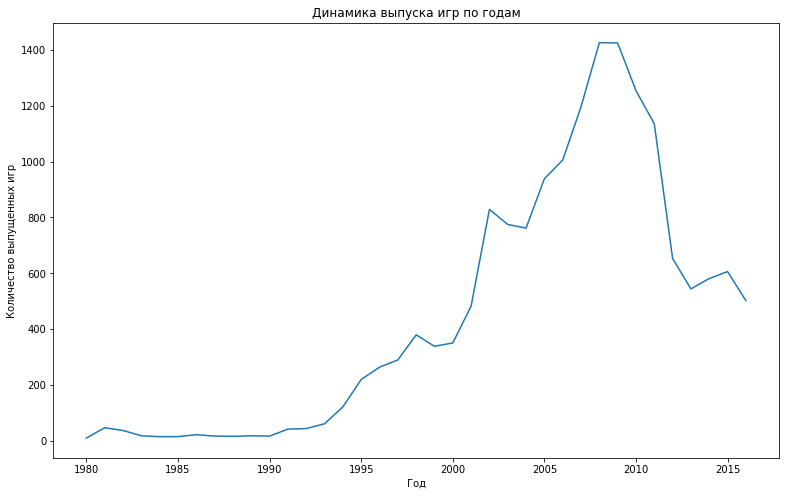

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

In [20]:
# Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

platform_sales = df.pivot_table(index='year_of_release', values='total_sales', aggfunc='count')
plt.figure(figsize=(13, 8))
(sns.lineplot(data = platform_sales, x = platform_sales.index, y = 'total_sales')
    .set(title = 'Динамика выпуска игр по годам', xlabel = 'Год', ylabel = 'Количество выпущенных игр'))
plt.show()
df['year_of_release'].value_counts()

Пиком для `gamedeva` были **2008** и **2009** годы, **1427** и **1426** игр было выпущено в эти года. Дальше виден спад. Имея на руках данные за все периоды, картина видна в целом.

#### Продажи по платформам

In [22]:
# посмотрим на топ платформ по продажам
df.groupby('platform').agg({'total_sales': 'sum'}).sort_values('total_sales', ascending=False).head(6)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


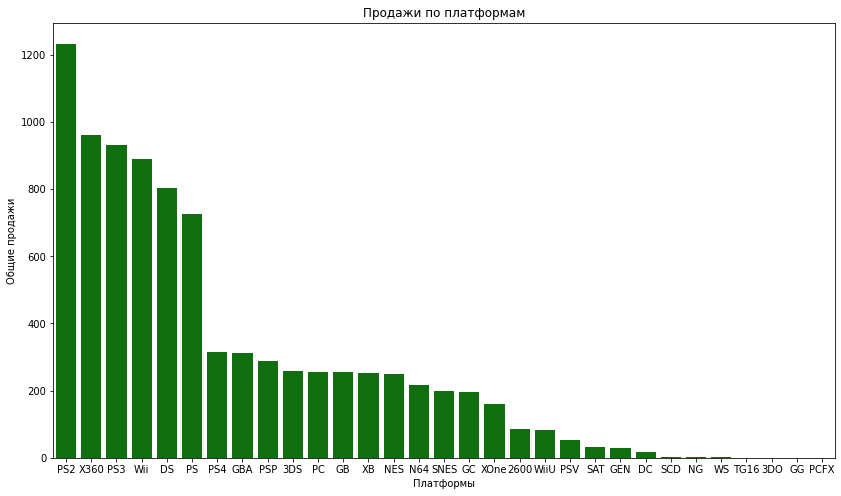

In [23]:
#top_10_p = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']
#df_gr.query('platform == @top_10_p').plot(kind='bar', grid=True, figsize=(30, 10))
platform_sales = df.groupby('platform').agg({'total_sales': 'sum'}).sort_values('total_sales', ascending=False)
plt.figure(figsize=(14, 8))
(sns.barplot(data = platform_sales, x = platform_sales.index, y = 'total_sales', color = 'green')
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

Что видно из данных?

- в топ-6 три компании, которые основательно закрепились на рынке. 

Как нызваются компании?

- Sony Computer Entertainment(PS2, PS3, PS), Nintendo(DS, Wii), Microsot(X360).

О чём это говорит?

- особой популярностью пользуются игровые консоли, японские консоли представлены на рынке в широком выборе и продажи по ним на высоком уровне.

PS2


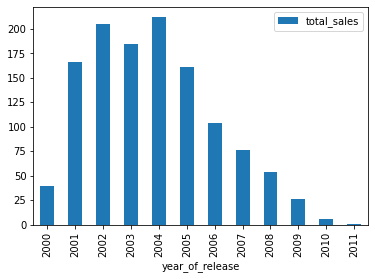

X360


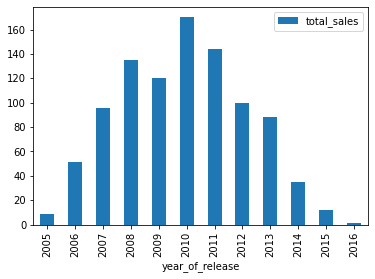

PS3


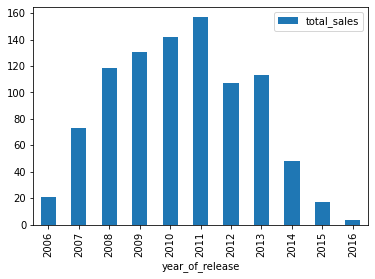

Wii


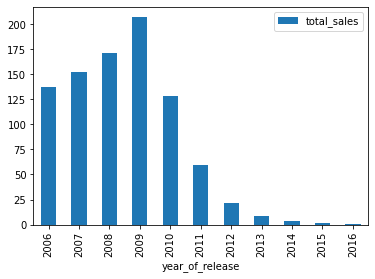

DS


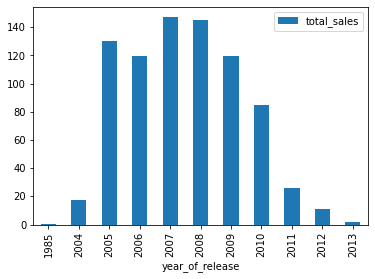

PS


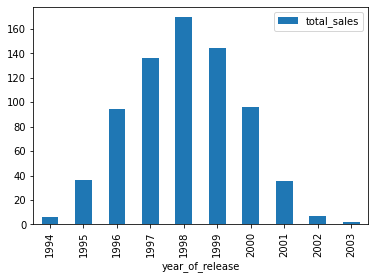

In [24]:
for platform in platform_sales.index[:6]:
    print(platform)
    (df
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()

In [25]:
# срок службы платформы
med = [10, 11, 11, 11, 12, 12]
med_1 = pd.Series(med)
display(med_1.mean())

11.166666666666666

Средний срок службы по этим платформам составляет 11.16 лет. По графикам видно, что эти платформы уходят в закат. Соответственно, на смену им должны были придти другие. 3 топовые компании никуда не делись с рынка. Они готовили замену своим консолям.

### Актуальный период

Таковым буду считать с 2014 по 2016. Виден спад по графикам к 2013 году, это связано с выходом новых платформ от Sony Computer Entertainment (PS4) и Microsoft(XOne).

### Не учитываем в работе данные за предыдущие годы.

In [26]:
# возьмём данные за актуальный период
df_fresh = df.query('year_of_release >= 2014').copy()

### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

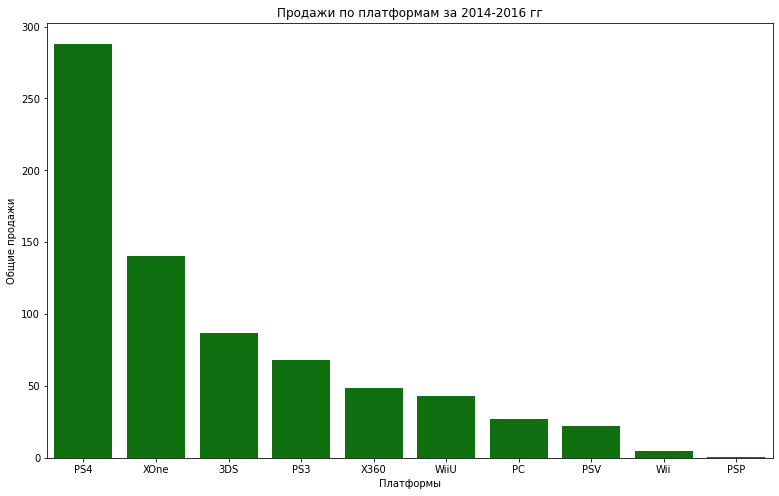

In [27]:
platform_sales_fresh = df_fresh.groupby('platform').agg({'total_sales': 'sum'}).sort_values('total_sales', ascending=False)
plt.figure(figsize=(13, 8))
(sns.barplot(data = platform_sales_fresh, x = platform_sales_fresh.index, y = 'total_sales', color = 'green')
    .set(title = 'Продажи по платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

PS4


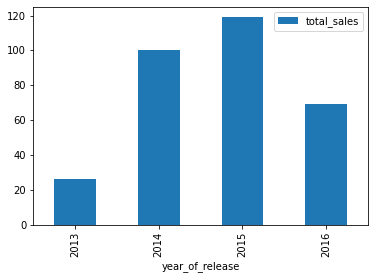

XOne


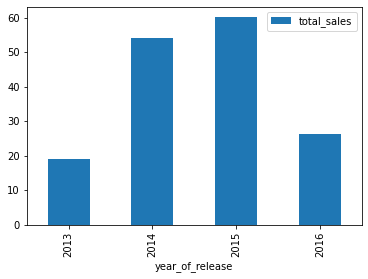

3DS


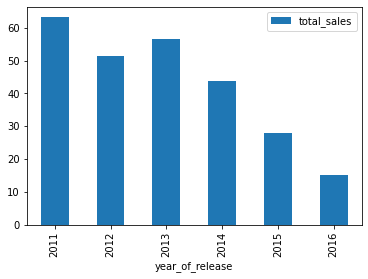

PS3


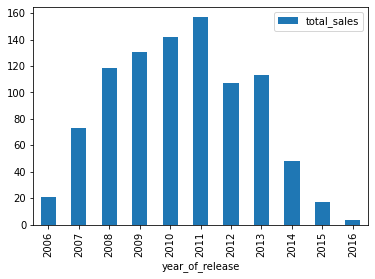

X360


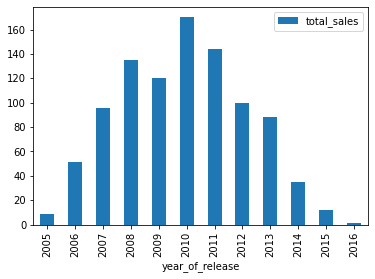

WiiU


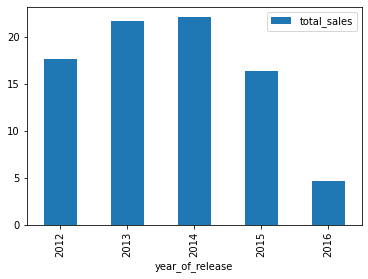

PC


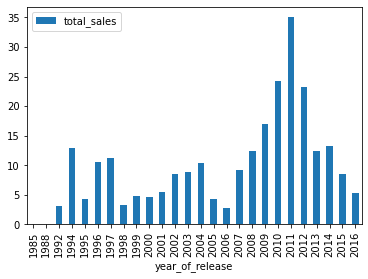

PSV


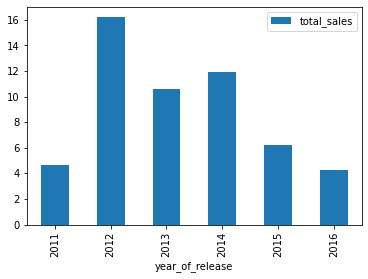

Wii


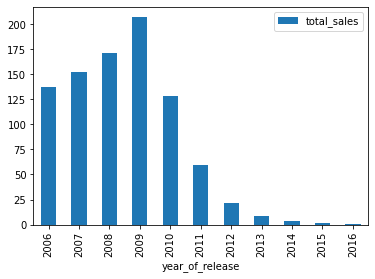

PSP


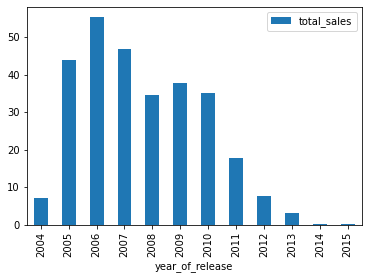

In [28]:
for platform in platform_sales_fresh.index:
    print(platform)
    (df
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()

PS4 и XOne растут, так как, на тот момент, являются новыми платформами и ресурсы направлены на них. PS3, X360, Wii, PSP испытывают спад, уходят в прошлое.

Будем считать потенциально прибыльными эти платформы: PS4, 3DS, XOne, WiiU, PC, PSV. Они достаточно молоды. Конечно, PC на фоне выделяется, но он вечно молод, так как можно менять начинку самому.

В платформах главным ресурсом является "начинка". Поэтому мы видем срок службы платформы и рассвет новой.

In [29]:
# поместим в переменную данные, с которыми будем работать в дальнейшем
persp_pl = ['PS4', 'XOne', 'WiiU', '3DS', 'PC', 'PSV']
df_fresh = df_fresh.query('platform == @persp_pl')

### Построим «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат:

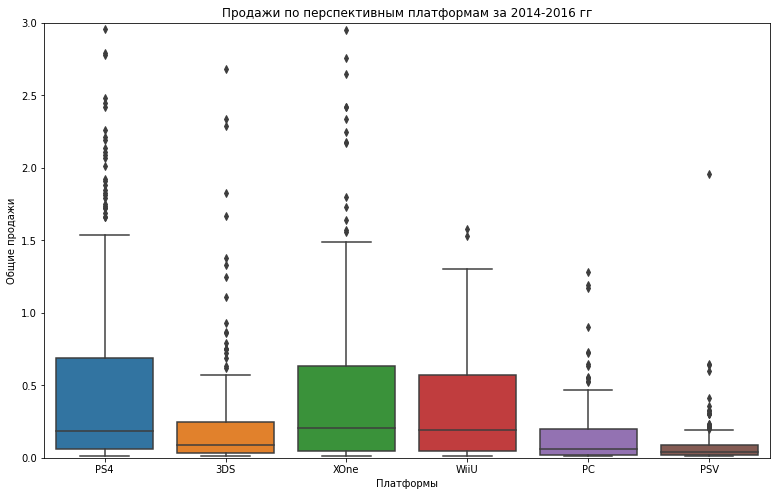

In [30]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = df_fresh, y = 'total_sales', x='platform')
    .set(
        title = 'Продажи по перспективным платформам за 2014-2016 гг', 
        xlabel = 'Платформы', ylabel = 'Общие продажи', 
        ylim=(0, 3)
    ))

plt.show()

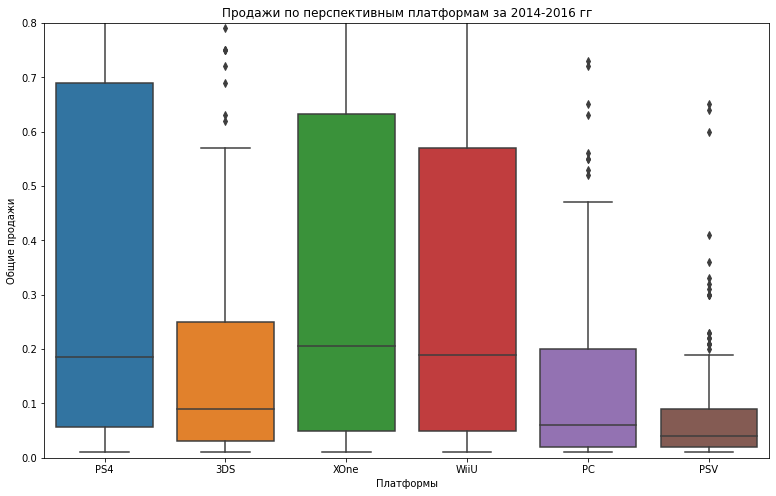

In [31]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = df_fresh, y = 'total_sales', x='platform')
    .set(
        title = 'Продажи по перспективным платформам за 2014-2016 гг', 
        xlabel = 'Платформы', ylabel = 'Общие продажи', 
        ylim=(0, .8)
    ))

plt.show()

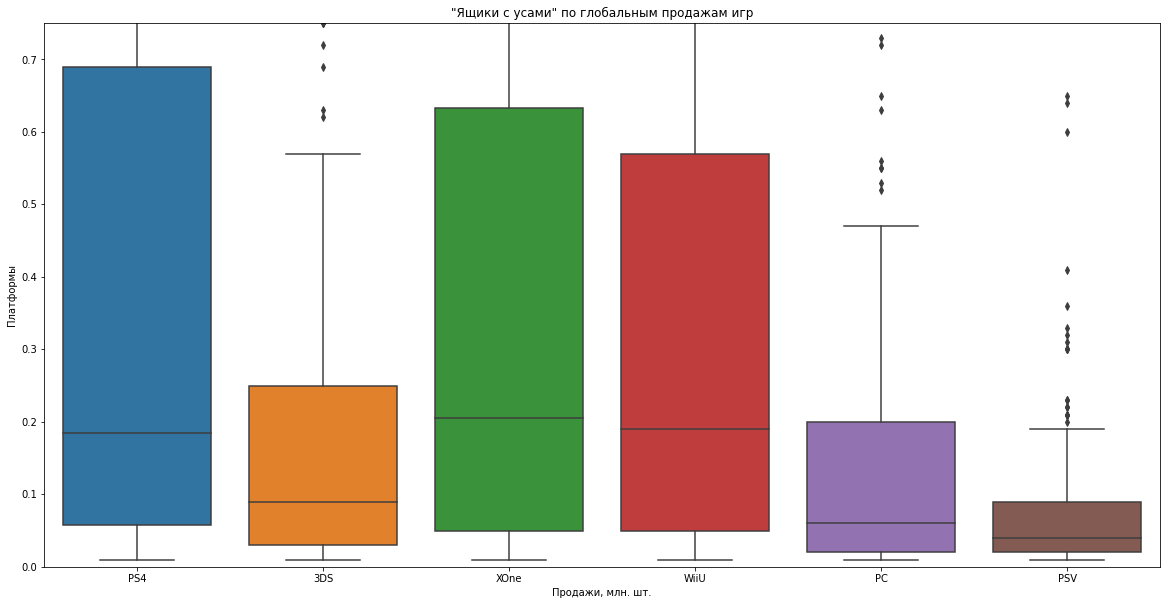

In [32]:
plt.figure(figsize=(20, 10))

sns.boxplot(x='platform',y='total_sales',data=df_fresh)

plt.ylim(0, .75)

plt.title('"Ящики с усами" по глобальным продажам игр')
plt.xlabel('Продажи, млн. шт.')
plt.ylabel('Платформы')

plt.show()


Видим три топовых платформы: PS4, XOne, WiiU.

Две на подхвате: 3DS, PC.

Одна отстаёт - PSV.

In [33]:
# выставим границу
#df_fresh = df_fresh.query('total_sales <= 3')

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

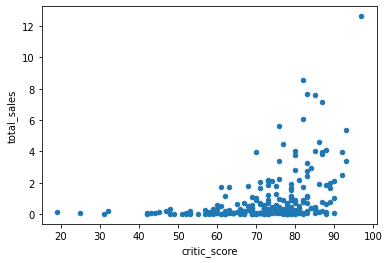

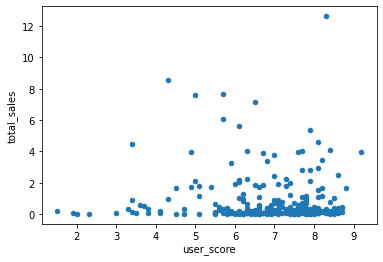

critic_score    0.401903
user_score     -0.043186
total_sales     1.000000
Name: total_sales, dtype: float64


In [34]:
# влияние внутри одной популярной платформы
games_on_platform = df_fresh.query('platform == "PS4"')
games_on_platform[games_on_platform['critic_score'] != -1].plot(kind='scatter', x='critic_score', y='total_sales')
games_on_platform[games_on_platform['user_score'] != -1].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()
print(games_on_platform[(games_on_platform['critic_score'] != -1) 
                        & (games_on_platform['user_score'] != -1)]
                       [['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

3DS


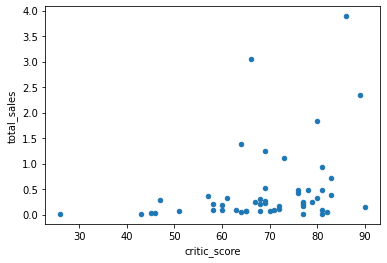

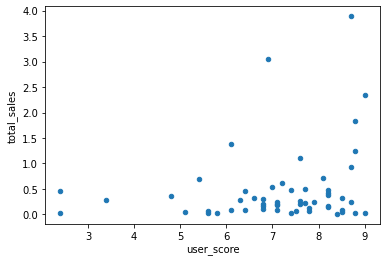

critic_score    0.284686
user_score      0.279850
total_sales     1.000000
Name: total_sales, dtype: float64
PC


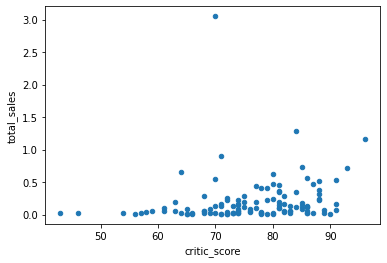

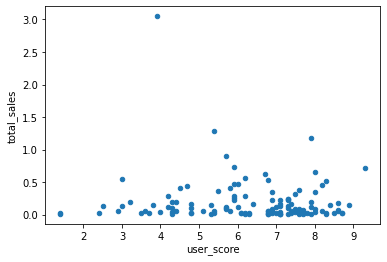

critic_score    0.172061
user_score     -0.089974
total_sales     1.000000
Name: total_sales, dtype: float64
PS4


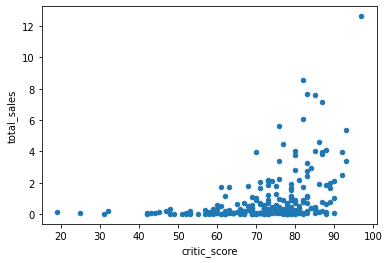

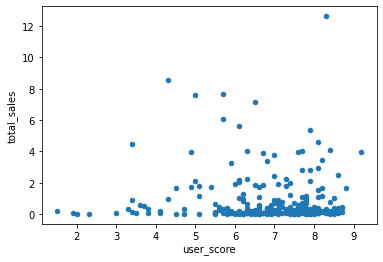

critic_score    0.401903
user_score     -0.043186
total_sales     1.000000
Name: total_sales, dtype: float64
PSV


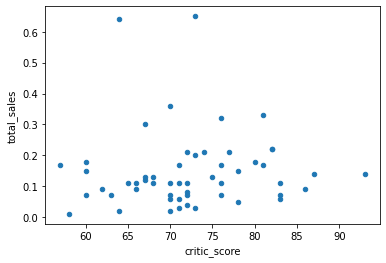

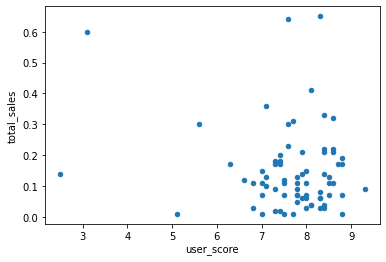

critic_score    0.041029
user_score      0.023528
total_sales     1.000000
Name: total_sales, dtype: float64
WiiU


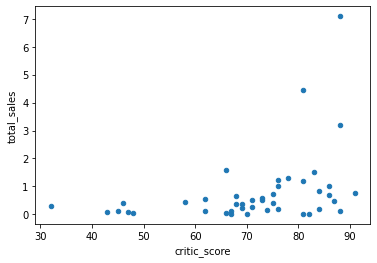

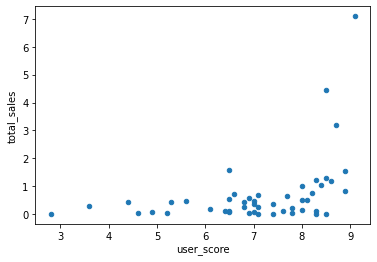

critic_score    0.375640
user_score      0.411451
total_sales     1.000000
Name: total_sales, dtype: float64
XOne


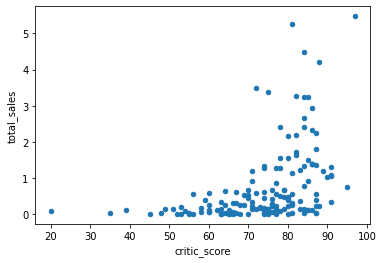

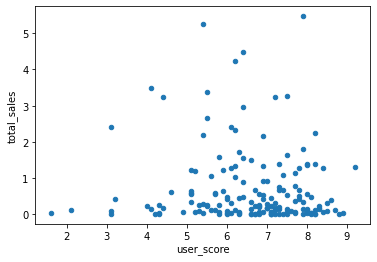

critic_score    0.422112
user_score     -0.091734
total_sales     1.000000
Name: total_sales, dtype: float64


In [35]:

for platform, games_on_platform in df_fresh.groupby('platform'):
    print('='*30)
    print(platform)
    games_on_platform[games_on_platform['critic_score'] != -1].plot(kind='scatter', x='critic_score', y='total_sales')
    games_on_platform[games_on_platform['user_score'] != -1].plot(kind='scatter', x='user_score', y='total_sales')
    plt.show()
    print(games_on_platform[(games_on_platform['critic_score'] != -1) 
                        & (games_on_platform['user_score'] != -1)]
                       [['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

<b>Оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют.</b>

### Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

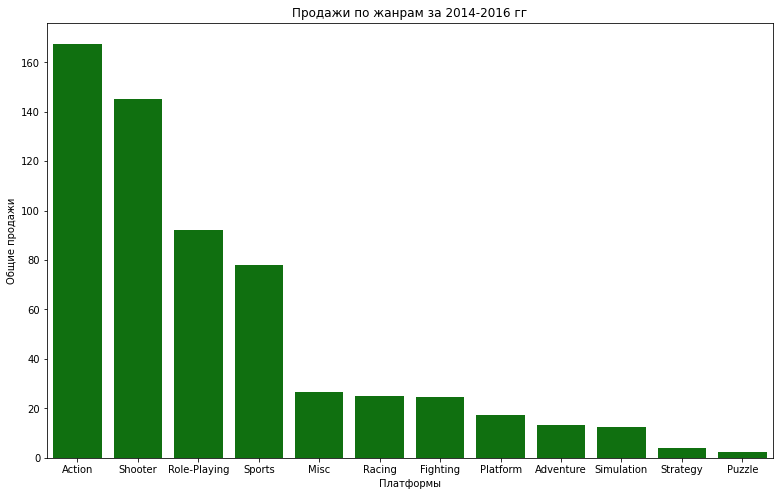

In [36]:
platform_sales_fresh = (
    df_fresh
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)

plt.figure(figsize=(13, 8))
(sns.barplot(data = platform_sales_fresh, x = platform_sales_fresh.index, y = 'total_sales', color = 'green')
    .set(title = 'Продажи по жанрам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи'))

plt.show()

Жанры с высокими продажами:
- Shooter;
- Sports;
- Platform;
- Fighting.

Жанры с низкими продажами:
- Adventure;
- Puzzle
- Strategy.

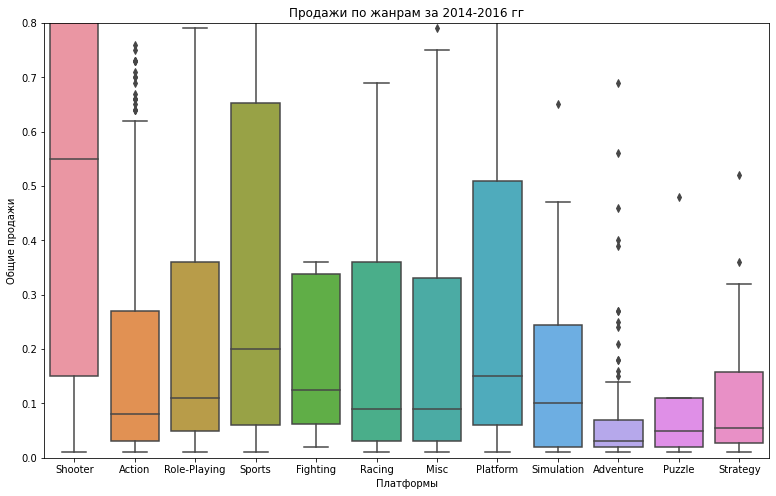

In [37]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = df_fresh, y = 'total_sales', x='genre')
    .set(title = 'Продажи по жанрам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, .8)))

plt.show()

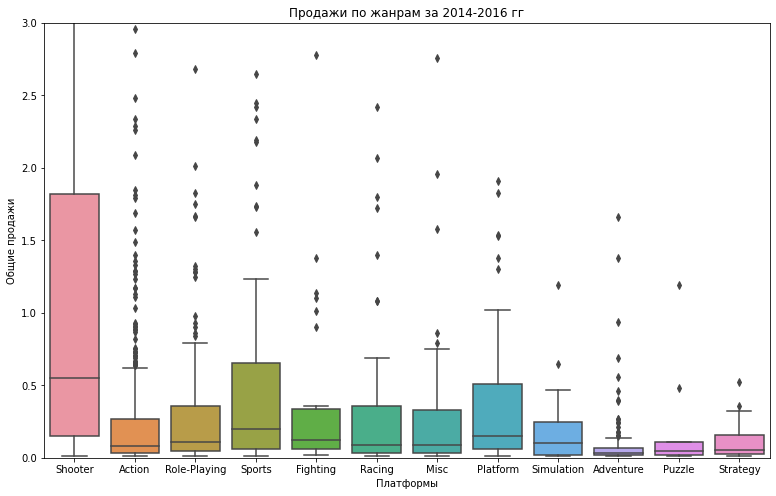

In [38]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = df_fresh, y = 'total_sales', x='genre')
    .set(title = 'Продажи по жанрам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show()

## Вывод по анализу

- особой популярностью пользуются игровые консоли, японские консоли представлены на рынке в широком выборе и продажи по ним на высоком уровне;
- средний срок службы по платформам составляет 11.16 лет;
- потенциально прибыльные платформы: PS4, 3DS, XOne, WiiU, PC, PSV;
- оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж.
- оценки пользователей корреляции с продажами не имеют.
- жанры с высокими продажами: Shooter, Sports, Platform, Fighting.

## Портрет пользователя каждого региона (NA, EU, JP)

### Самые популярные платформы (топ-5). Опишем различия в долях продаж.

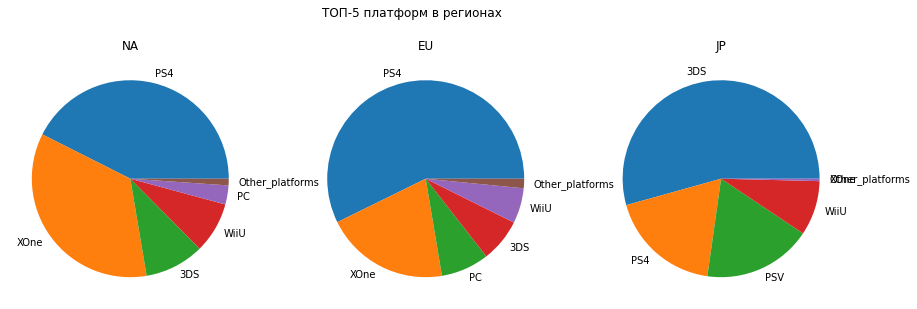

In [39]:
# задаем список регионов
countries = df_fresh.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  # выберем 5 самых продающих платформ
  df_i = (df_fresh.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Other_platforms
  df_i = df_i.append({'platform': 'Other_platforms', countries[i]: df_fresh[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'])

  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

ТОП-5 популярных платформ во всех трех регионах охватывает более 95% рынка. 
- Для NA в топе: PS4, XOne, 3DS, WiiU, PС;
- Для EU в топе: PS4, XOne, 3DS, WiiU, PC;
- Для JP в топе: 3DS, PS4, PSV, WiiU.

Характерны отличия по платформам для регионов. Это связано с местными предпочтениями. Например, в JP не пользуется популярностью XOne. Япония предана своим традициям и местным компаниям. PSV пользуется спросом в Японии, в других регионах ей не отдают предпочтения. 3DS также ярко выражена в JP, для других регионов она мало характерна.

### Самые популярные жанры (топ-5). В чём разница.

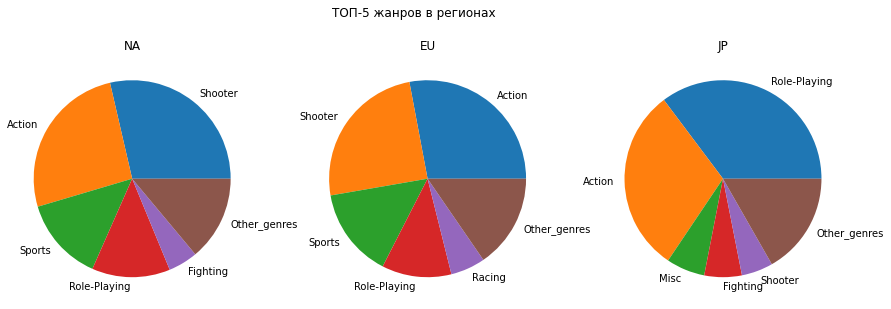

In [40]:
# задаем список регионов
countries = df_fresh.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  # выберем 5 самых продающих жанров
  df_g = (df_fresh.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Other_platforms
  df_g = df_g.append({'genre': 'Other_genres', countries[i]: df_fresh[countries[i]].sum() - df_g[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_g[countries[i]], labels = df_g['genre'])

  # Зададим название региона.
  axs[i].set_title(df_g.columns[1].split('_')[0].upper())
plt.show()

Заметна разница в жанрах по регионам.

- в NA предпочтение отдают Action и Shooter играм.
- в EU вкусы схожи с NA, но с одним отличием Fighting заменился на Racing.
- в JP свои предпочтения, лидируют жанры Action, Role-Playing игры. Следом идут Misc, Fighting, Schooter игры.

Как мне кажется, причина в различиях кроется в разных путях развития регионов. Сходство было и в развитии, так что есть и одинаковые предпочтения. Дважды колесо не изобрести.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

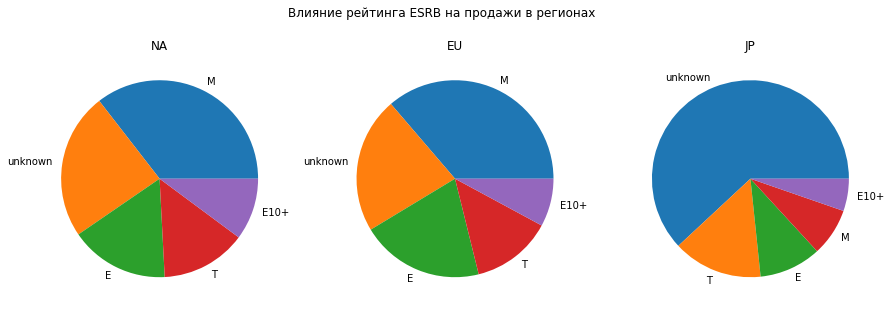

In [41]:
# задаем список регионов
countries = df_fresh.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Влияние рейтинга ESRB на продажи в регионах')
for i in range(3):
  # выберем 5 самых продающих жанров
  df_r = (df_fresh.groupby('rating')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
#  # занесем все остальыне продажи в Other_platforms
#  df_r = df_r.append({'rating': 'Other_rating', countries[i]: df_fresh[countries[i]].sum() - df_r[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_r[countries[i]], labels = df_r['rating'])

  # Зададим название региона.
  axs[i].set_title(df_r.columns[1].split('_')[0].upper())
plt.show()

Продажи в NA и EU по рейтингу ESRB схожи.
JP имеют различия, по нисходящему: T(«Подросткам»), E(«Для всех»), M(«Для взрослых»), E10+(«Для всех от 10 лет и старше»).
Большое количество продаж с рейтингом 'unknown'. Жаль, что эти данные неизвестны.

- характерны отличия по платформам для регионов;
- NA и EU схожи в предпочтениях по жанрам, JP в большей степени имеет свой путь;
- продажи в NA и EU по рейтингу ESRB схожи. JP имеют различия.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**H0**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**H1**: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [42]:
# удаляем значения-заглушки
games_with_score = df_fresh[df_fresh['user_score'] != -1]

print('Средний пользовательский рейтинг платформ Xbox One', round(games_with_score.query('platform == "XOne"')['user_score'].mean(),2))
print('Средний пользовательский рейтинг платформ PC', round(games_with_score.query('platform == "PC"')['user_score'].mean(),2))
print()

results = st.ttest_ind(
    df_fresh.query('platform == "XOne"')['user_score'], 
    df_fresh.query('platform == "PC"')['user_score'], 
    equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг платформ Xbox One 6.59
Средний пользовательский рейтинг платформ PC 6.3

p-значение: 0.26246058734014605
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги платформ PS 4 и PC одинаковые

**H0**: Средние пользовательские рейтинги платформ PS4 и PC одинаковые.

**H1**: Средние пользовательские рейтинги платформ PS4 и PC различаются.

In [43]:
# удаляем значения-заглушки
games_with_score = df_fresh[df_fresh['user_score'] != -1]

print('Средний пользовательский рейтинг платформ PS4', round(games_with_score.query('platform == "PS4"')['user_score'].mean(),2))
print('Средний пользовательский рейтинг платформ PC', round(games_with_score.query('platform == "PC"')['user_score'].mean(),2))
print()

results = st.ttest_ind(
    df_fresh.query('platform == "PS4"')['user_score'], 
    df_fresh.query('platform == "PC"')['user_score'], 
    equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг платформ PS4 6.83
Средний пользовательский рейтинг платформ PC 6.3

p-значение: 0.010563604775302316
Отвергаем нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports разные

**H0**: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

**H1**: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [44]:
# удаляем значения-заглушки
games_with_score = df_fresh[df_fresh['user_score'] != -1]

print('Средний пользовательский рейтинг жанра Action', round(games_with_score.query('genre == "Action"')['user_score'].mean(),2))
print('Средний пользовательский рейтинг жанра Sports', round(games_with_score.query('genre == "Sports"')['user_score'].mean(),2))
print()

results = st.ttest_ind(
    df_fresh.query('genre == "Action"')['user_score'], 
    df_fresh.query('genre == "Sports"')['user_score'], 
    equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг жанра Action 6.83
Средний пользовательский рейтинг жанра Sports 5.64

p-значение: 3.8203839443688965e-06
Отвергаем нулевую гипотезу


## Вывод по гипотезам

- у нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются;
- у нас нет оснований утверждать, что средние пользовательские рейтинги платформ PS4 и PC одинаковы;
- у нас нет оснований утверждать, что средние пользовательские рейтинги жанров Action и Sports одинаковы.

Добавил ещё одну гипотезу, по PS4 и PC. Так как без неё, как мне кажется, результат будет неполным.
PS4 завоёвывала аудиторию качественными эксклюзивами, поэтому у неё перед PC и XOne есть отличие. Эта фишка влияет на рейтинг. Эксклюзивов на PS4 больше, чем на XOne и они качественнее. 

## Общий вывод

Проблемы, которые выявились при чтении данных:
- названия столбцов не соответствуют регламенту(snake_case);
- пропуски в данных(Name, Genre, Year_of_Release, Critic_Score, User_Score, Rating);
- неверные типы данных(Year_of_Release).

Подготовка данных:
- названия столбцов приведены к нижнему регистру;
- обработаны пропуски;
- данные приведены к нужным типам;
- подсчитана сумма продаж по каждой игре.

Результат анализа:
- особой популярностью пользуются игровые консоли, японские консоли представлены на рынке в широком выборе и продажи по ним на высоком уровне;
- средний срок службы по платформам составляет 11.16 лет;
- потенциально прибыльные платформы: PS4, 3DS, XOne, WiiU, PC, PSV;
- оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж.
- оценки пользователей корреляции с продажами не имеют.
- жанры с высокими продажами: Shooter, Sports, Platform, Fighting.

Портрет пользователей:
- характерны отличия по платформам для регионов;
- NA и EU схожи в предпочтениях по жанрам, JP в большей степени имеет свой путь;
- продажи в NA и EU по рейтингу ESRB схожи. JP имеют различия.

Что показали гипотезы:
- у нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются;
- у нас нет оснований утверждать, что средние пользовательские рейтинги платформ PS4 и PC одинаковы;
- у нас нет оснований утверждать, что средние пользовательские рейтинги жанров Action и Sports одинаковы.

Характерные черты потенциально популярного продукта для планирования рекламных кампаний:
- PS4, XOne, 3DS, WiiU, PС, PSV;
- Shooter, Sports, Platform, Fighting;
- рейтинг ESRB: M(«Для взрослых»), E(«Для всех»), T(«Подросткам»).